In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fontTools.subset import subset
from graphviz import pipe_lines
from mlflow import catboost
from pandas.core.common import random_state
from scipy.constants import precision
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
from sklearn.metrics import average_precision_score
import mlflow
from sklearn.preprocessing import OrdinalEncoder
mlflow.set_registry_uri('./mlruns')
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('data/taxi_trip_pricing.csv')

In [4]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [5]:
df.dropna(subset=['Trip_Price'], inplace=True)

In [6]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              49
Day_of_Week              46
Passenger_Count          48
Traffic_Conditions       50
Weather                  46
Base_Fare                44
Per_Km_Rate              44
Per_Minute_Rate          49
Trip_Duration_Minutes    46
Trip_Price                0
dtype: int64

In [7]:
#df = df.fillna(df.select_dtypes(include=['number']).mean())


In [8]:
#df.dropna(inplace=True)

In [9]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [10]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,901.000000,903.000000,907.000000,907.000000,902.000000,905.000000,951.000000
mean,27.190998,2.479513,3.497100,1.229934,0.293902,62.044144,56.874773
std,20.155134,1.100983,0.866729,0.429958,0.115404,32.321578,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.630000,2.000000,2.730000,0.850000,0.190000,35.590000,33.742650
50%,25.870000,2.000000,3.510000,1.220000,0.290000,61.570000,50.074500
75%,38.680000,3.000000,4.230000,1.610000,0.390000,89.210000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


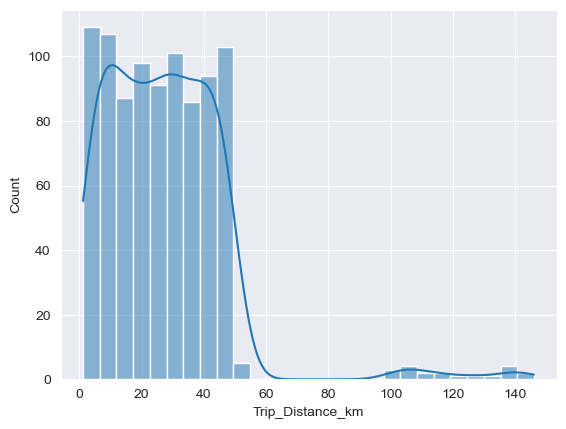

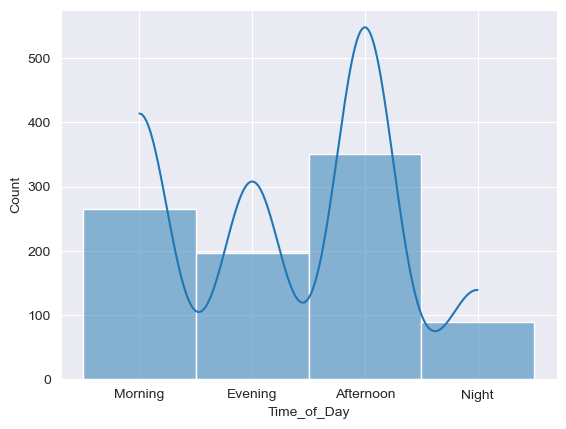

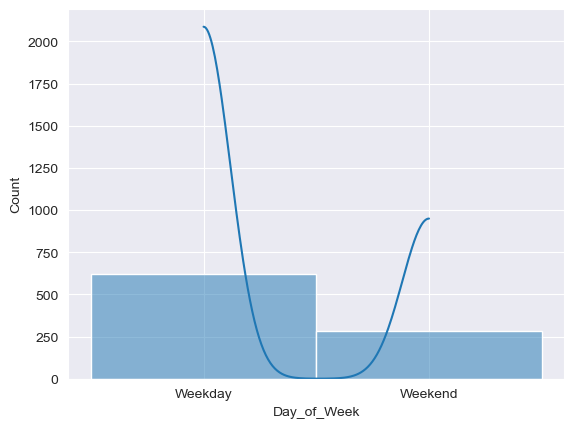

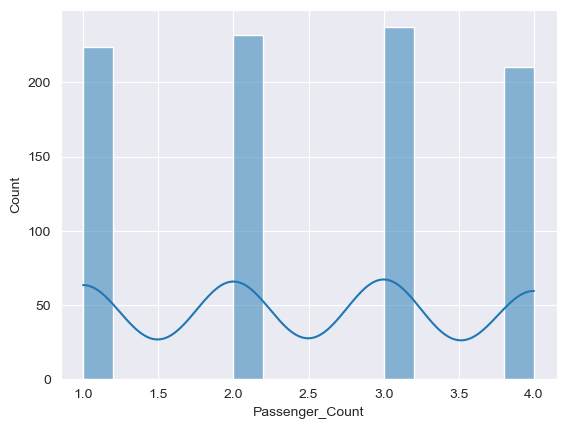

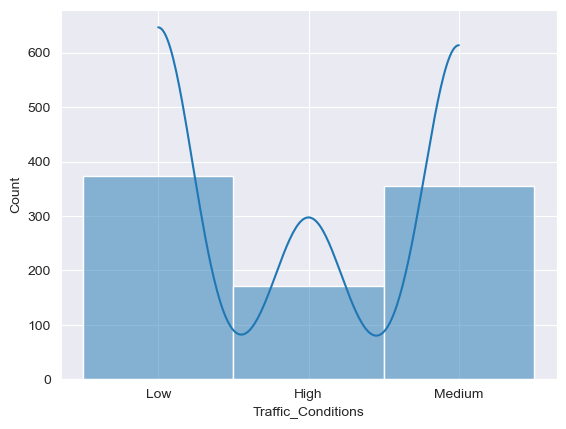

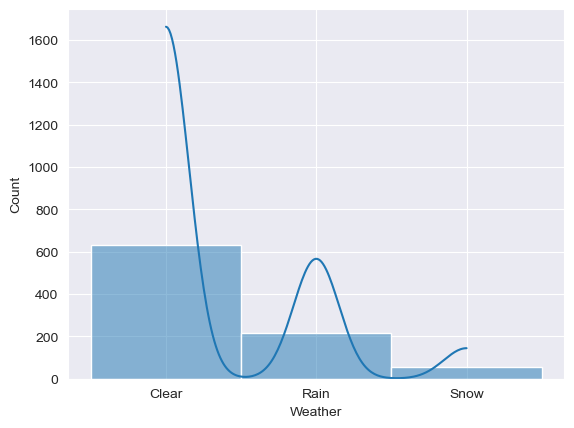

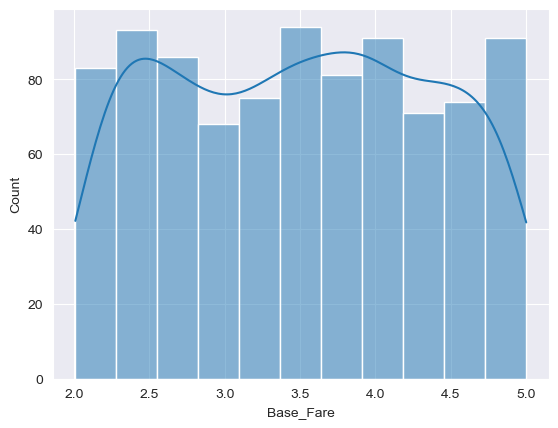

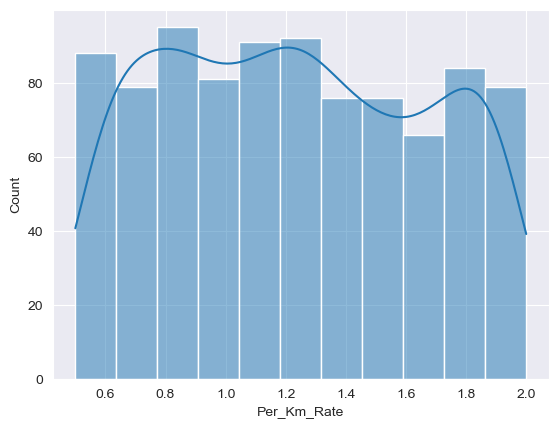

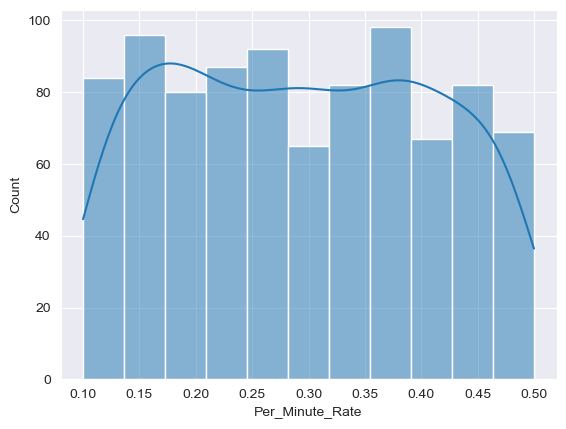

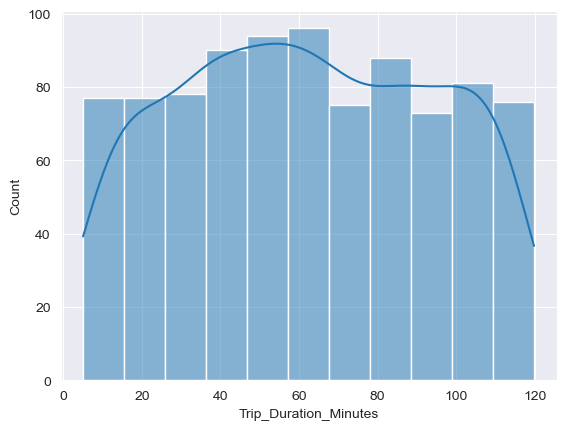

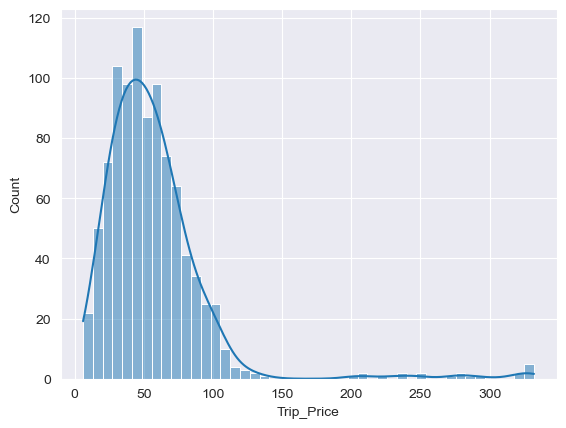

In [11]:
for col in df.columns:
    sns.histplot(data = df, x=col, kde=30)
    plt.show()

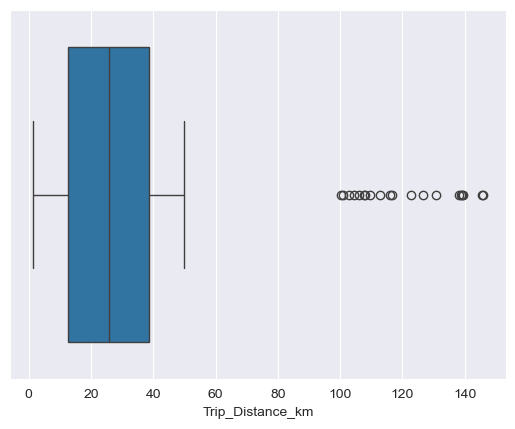

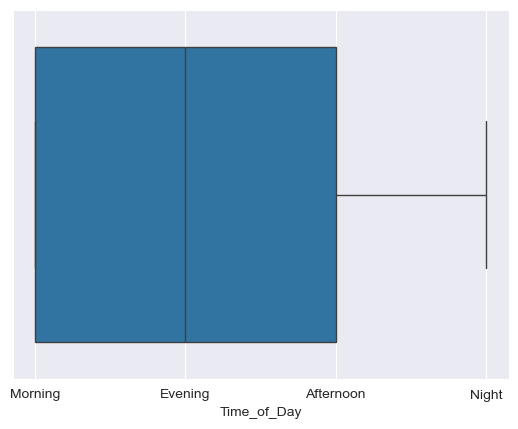

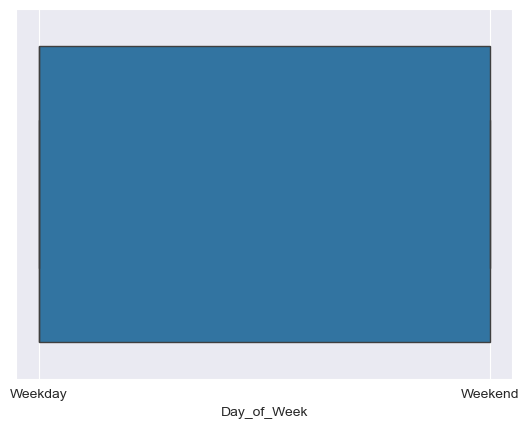

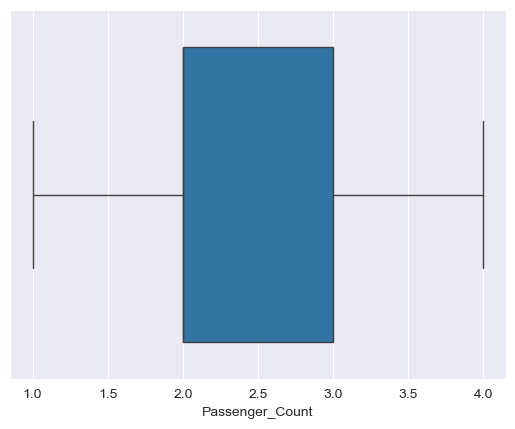

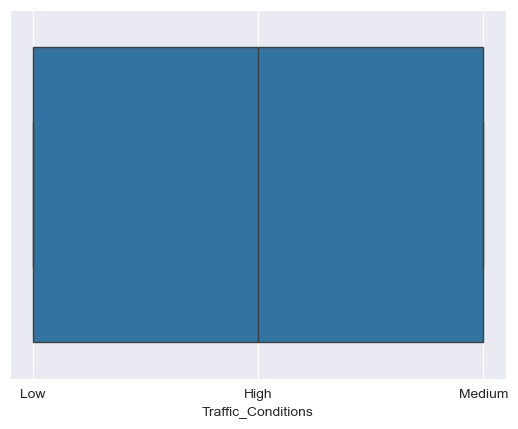

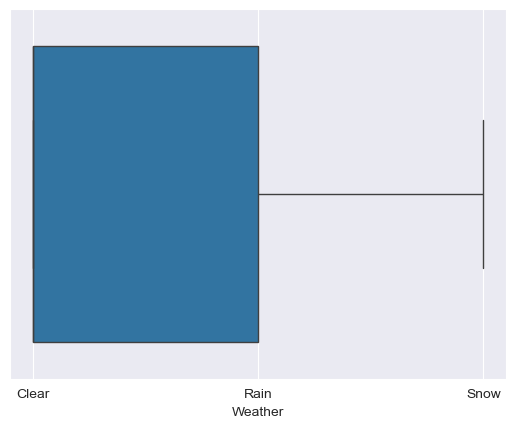

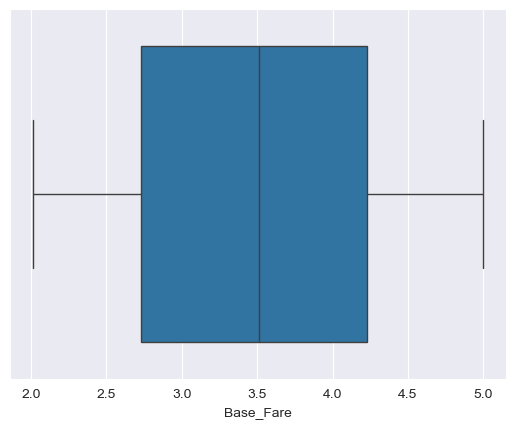

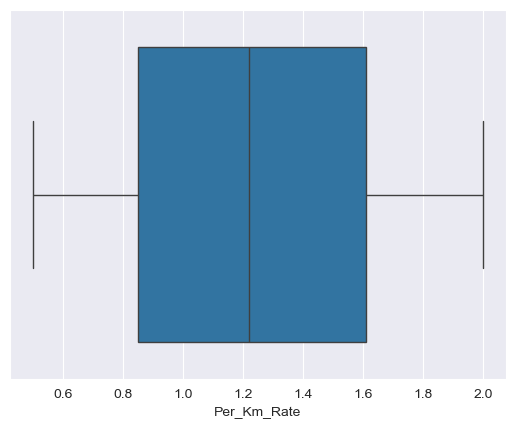

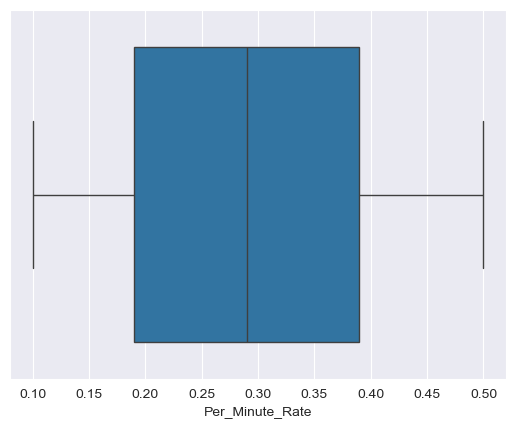

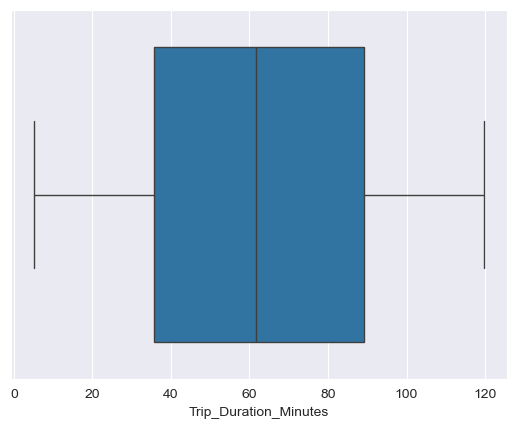

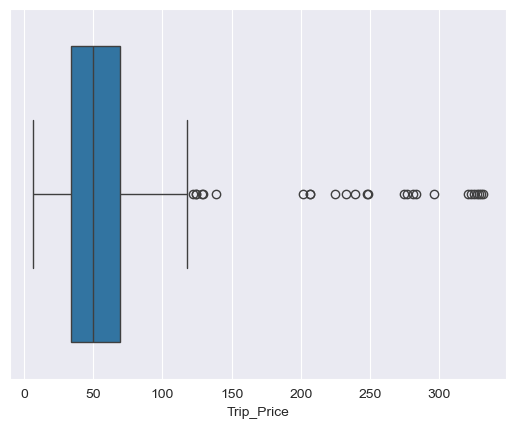

In [12]:
for col in df.columns:
    sns.boxplot(data = df, x=col)
    plt.show()

In [13]:
df.dtypes


Trip_Distance_km         float64
Time_of_Day               object
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Weather                   object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object

In [14]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [15]:
X = df.drop(columns=['Trip_Price'])
y = df['Trip_Price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
340,25.09,Morning,Weekend,2.0,Medium,Snow,3.25,1.87,0.33,70.95
571,39.40,NaN,Weekend,2.0,Medium,Rain,2.92,1.15,0.27,91.44
584,NaN,Night,Weekday,4.0,Low,Clear,2.73,1.47,0.37,42.88
115,43.70,NaN,Weekday,3.0,Low,Clear,4.52,1.59,0.28,114.29
81,31.54,Morning,Weekday,2.0,High,Clear,3.09,1.91,0.26,93.37
...,...,...,...,...,...,...,...,...,...,...
112,46.56,Morning,Weekday,3.0,Low,Clear,4.46,0.87,0.46,119.21
291,2.83,Morning,Weekday,1.0,Low,Snow,3.99,0.96,0.19,11.65
904,21.65,Evening,Weekday,3.0,High,Clear,2.18,1.05,NaN,24.22
461,32.81,Afternoon,Weekend,NaN,Low,Clear,4.84,NaN,0.23,64.74


In [18]:
y_train


340     73.5818
571     72.9188
584     65.6944
115    106.0042
81      87.6076
         ...   
112     99.8038
291      8.9203
904     31.6941
461     55.8212
107     66.2817
Name: Trip_Price, Length: 760, dtype: float64

In [19]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [20]:
cat_cols

['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

In [21]:
num_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    ('power_transformer', PowerTransformer())

])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
])

transformer = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

main_pipe_ct = Pipeline([
    ("preprocessor", transformer),

    ("cat", CatBoostRegressor(iterations=500, verbose=100,cat_features=['cat__' + col for col in cat_cols]))
    
])

main_pipe_ct.fit(X_train, y_train)
y_pred_ct = main_pipe_ct.predict(X_test)

Learning rate set to 0.068879
0:	learn: 36.7729903	total: 170ms	remaining: 1m 24s
100:	learn: 6.9285804	total: 4.04s	remaining: 16s
200:	learn: 4.2295326	total: 6.45s	remaining: 9.6s
300:	learn: 3.0935801	total: 8.74s	remaining: 5.78s
400:	learn: 2.3393860	total: 11.2s	remaining: 2.77s
499:	learn: 1.8647264	total: 13.6s	remaining: 0us


In [22]:
transformer.fit_transform(X_train, y_train)

,num__Trip_Distance_km,num__Passenger_Count,num__Base_Fare,num__Per_Km_Rate,num__Per_Minute_Rate,num__Trip_Duration_Minutes,cat__Time_of_Day,cat__Day_of_Week,cat__Traffic_Conditions,cat__Weather
340,0.136674,-0.347363,-0.245765,1.454984,0.332125,0.337535,Morning,Weekend,Medium,Snow
571,0.805345,-0.347363,-0.634932,-0.114287,-0.190810,0.900743,unknown,Weekend,Medium,Rain
584,NaN,1.338118,-0.864017,0.618804,0.673320,-0.509239,Night,Weekday,Low,Clear
115,0.974790,0.540305,1.165729,0.878135,-0.102692,1.491801,unknown,Weekday,Low,Clear
81,0.461989,-0.347363,-0.433126,1.534436,-0.279324,0.952023,Morning,Weekday,High,Clear
...,...,...,...,...,...,...,...,...,...,...
112,1.081628,0.540305,1.101707,-0.814819,1.420817,1.614922,Morning,Weekday,Low,Clear
291,-1.857308,-1.372305,0.591663,-0.582810,-0.910436,-1.661114,Morning,Weekday,Low,Snow
904,-0.058988,0.540305,-1.550648,-0.357453,NaN,-1.153183,Evening,Weekday,High,Clear
461,0.520911,NaN,1.503300,NaN,-0.547291,0.158960,Afternoon,Weekend,Low,Clear


In [23]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('power_transformer', PowerTransformer())

])
cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first'))
])

main_pipe_dt = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])),

    ("dt", DecisionTreeRegressor(max_depth=6, random_state=42))
])

main_pipe_dt.fit(X_train, y_train)
y_pred_dt = main_pipe_dt.predict(X_test)


main_pipe_rf = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])),

    ("rf", RandomForestRegressor(n_estimators=200, random_state=42))
])

main_pipe_rf.fit(X_train, y_train)
y_pred_rf = main_pipe_rf.predict(X_test)


C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
def objective(trial):
    #criterion = trial.suggest_categorical("criterion", ["mse", "mae"])
    max_depth = trial.suggest_int("max_depth", 1, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    #max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])
    ccp_alpha = trial.suggest_float("ccp_alpha", 0, 1)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 10)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    main_pipe_dt = Pipeline([
        ("preprocessor", ColumnTransformer([
            ("num", num_pipe, num_cols),
            ("cat", cat_pipe, cat_cols)
        ])),

        ("dt", DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,
                                     min_weight_fraction_leaf=min_weight_fraction_leaf, ccp_alpha=ccp_alpha,
                                     max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease,
                                     random_state=42))
    ])

    scores = cross_val_score(main_pipe_dt, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()

    return -np.mean(scores)






In [25]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

[I 2025-04-06 15:03:04,443] A new study created in memory with name: no-name-14e13a96-8da7-426e-8591-470fb174e102
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\smalc\anaconda3\

In [26]:
study.best_params

{'max_depth': 8,
 'min_samples_split': 3,
 'min_samples_leaf': 8,
 'min_weight_fraction_leaf': 0.08903321320433016,
 'ccp_alpha': 0.9473574212637037,
 'max_leaf_nodes': 7,
 'min_impurity_decrease': 0.7495060563639954}

In [27]:
main_pipe_dt = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])),

    ("dt", DecisionTreeRegressor(**study.best_params, random_state=42))
])
main_pipe_dt.fit(X_train, y_train)

C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  ['Trip_Distance_km',
                                                   'Passenger_Count',
                                                   'Base_Fare', 'Per_Km_Rate',
                                                   'Per_Minute_Rate',
                                                   'Trip_Duration_Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Time_of_Day', 'Day_of_Week',
                                                   'Traffic_Conditions',
                                                   'Weather'])])),
                ('dt',
                 DecisionTreeRegressor(ccp_alpha=0.9473574212637037,
                                       max_depth=8, max_leaf_nodes=7,
                                       min_impurity_decrease=0.7495060563639954,
                                       min_samples_leaf=8, min_samples_split=3,
                                       min_weight_fraction_leaf=0.08903321320433016,
                                       random_state=42))])

In [28]:
mlflow.set_experiment("Decision Tree")

<Experiment: artifact_location='file:///C:/Users/smalc/DataspellProjects/taxi_fare/mlruns/602966325351507387', creation_time=1743533897053, experiment_id='602966325351507387', last_update_time=1743533897053, lifecycle_stage='active', name='Decision Tree', tags={}>

In [29]:
with mlflow.start_run(run_name="Decision Tree"):
    mlflow.log_params(study.best_params)
    mlflow.log_metric("MSE", mean_squared_error(y_test, main_pipe_dt.predict(X_test)))
    mlflow.log_metric("MAE", mean_absolute_error(y_test, main_pipe_dt.predict(X_test)))
    mlflow.log_metric("R2", r2_score(y_test, main_pipe_dt.predict(X_test)))
    mlflow.sklearn.log_model(main_pipe_dt, "model")
    
    

2025/04/06 15:03:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [30]:
def objective(trial):
    depth = trial.suggest_int("max_depth", 1, 10)
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    ccp_alpha = trial.suggest_float("ccp_alpha", 0, 1)

    max_samples = trial.suggest_float("max_samples", 0.1, 1)
    #max_features = trial.suggest_float("max_features", 0.1, 1)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)


    main_pipe_rf = Pipeline([
        ("preprocessor", ColumnTransformer([
            ("num", num_pipe, num_cols),
            ("cat", cat_pipe, cat_cols)
        ])),

        ("rf", RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, random_state=42, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_samples=max_samples, ccp_alpha=ccp_alpha))
    ])



    score = cross_val_score(main_pipe_rf, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()

    return -np.mean(score)




In [31]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)


[I 2025-04-06 15:03:17,246] A new study created in memory with name: no-name-78448319-6ae6-4e9f-8f31-04be56a22ac9
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\smalc\anaconda3\

In [32]:
study.best_params

{'max_depth': 9,
 'n_estimators': 272,
 'ccp_alpha': 0.04292414893069829,
 'max_samples': 0.6857020757467545,
 'min_samples_split': 9,
 'min_samples_leaf': 4}

In [33]:
main_pipe_rf = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])),

    ("rf", RandomForestRegressor(**study.best_params, random_state=42))
])
main_pipe_rf.fit(X_train, y_train)

C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  ['Trip_Distance_km',
                                                   'Passenger_Count',
                                                   'Base_Fare', 'Per_Km_Rate',
                                                   'Per_Minute_Rate',
                                                   'Trip_Duration_Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Time_of_Day', 'Day_of_Week',
                                                   'Traffic_Conditions',
                                                   'Weather'])])),
                ('rf',
                 RandomForestRegressor(ccp_alpha=0.04292414893069829,
                                       max_depth=9,
                                       max_samples=0.6857020757467545,
                                       min_samples_leaf=4, min_samples_split=9,
                                       n_estimators=272, random_state=42))])

In [34]:
mlflow.set_experiment("Random Forest")

<Experiment: artifact_location='file:///C:/Users/smalc/DataspellProjects/taxi_fare/mlruns/859426541503044266', creation_time=1743534936073, experiment_id='859426541503044266', last_update_time=1743534936073, lifecycle_stage='active', name='Random Forest', tags={}>

Mean Squared Error (MSE): 411.6442
Root Mean Squared Error (RMSE): 20.2890
Mean Absolute Error (MAE): 10.7459
R² Score: 0.8239
Mean Absolute Percentage Error (MAPE): 18.28%
Median Absolute Error: 7.0784
Mean Absolute Error: 10.7459


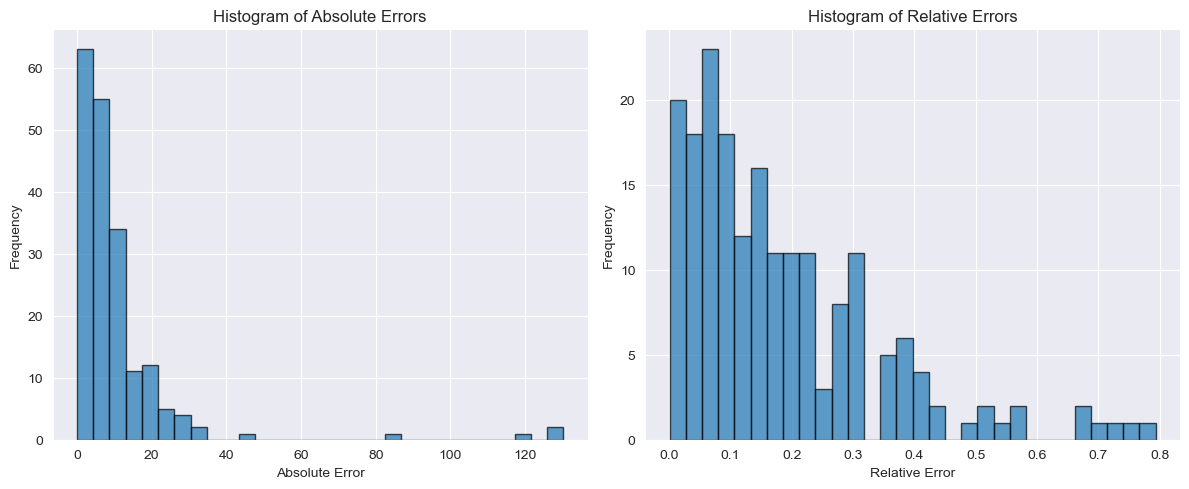

In [35]:
mse = mean_squared_error(y_test, y_pred_dt) # Calculate Evaluation Metrics
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100

# Errors
absolute_errors = np.abs(y_test - y_pred_dt)
relative_errors = absolute_errors / np.abs(y_test)  # Relative error (percentage form)
differences = y_test - y_pred_dt  # Differences between true and predicted

# Median and Mean of Errors
median_abs_error = np.median(absolute_errors)
mean_abs_error = np.mean(absolute_errors)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Median Absolute Error: {median_abs_error:.4f}")
print(f"Mean Absolute Error: {mean_abs_error:.4f}")

# Plot Histogram of Absolute Errors
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(absolute_errors, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Histogram of Absolute Errors")

# Plot Histogram of Relative Errors
plt.subplot(1, 2, 2)
plt.hist(relative_errors, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Relative Error")
plt.ylabel("Frequency")
plt.title("Histogram of Relative Errors")

plt.tight_layout()
plt.show()


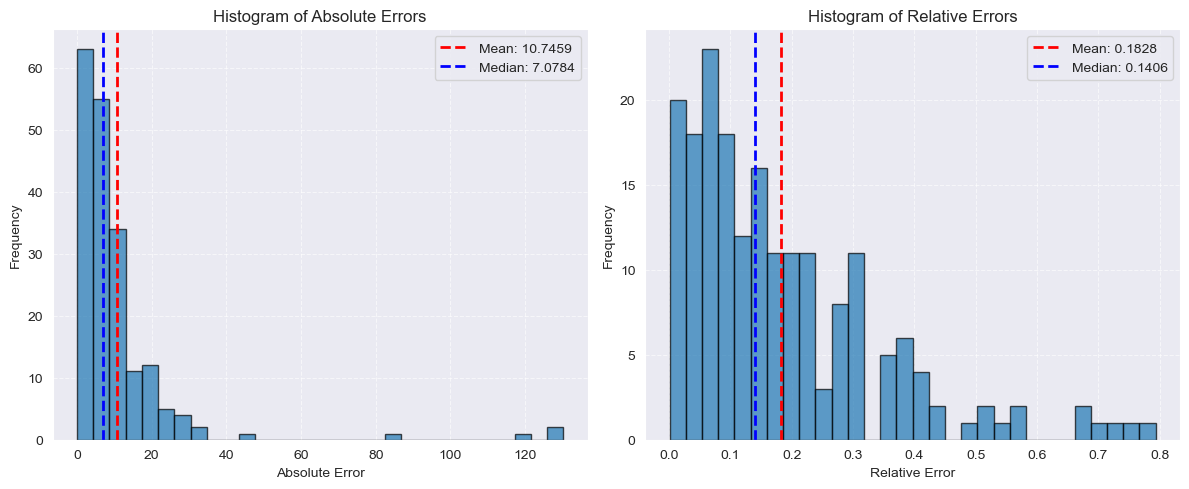

In [36]:
mean_abs_error = np.mean(absolute_errors)
median_abs_error = np.median(absolute_errors)

mean_rel_error = np.mean(relative_errors)
median_rel_error = np.median(relative_errors)

plt.figure(figsize=(12, 5))

# Histogram of Absolute Errors
plt.subplot(1, 2, 1)
plt.hist(absolute_errors, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean_abs_error, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_abs_error:.4f}")
plt.axvline(median_abs_error, color='blue', linestyle='dashed', linewidth=2, label=f"Median: {median_abs_error:.4f}")
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Histogram of Absolute Errors")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Histogram of Relative Errors
plt.subplot(1, 2, 2)
plt.hist(relative_errors, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean_rel_error, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_rel_error:.4f}")
plt.axvline(median_rel_error, color='blue', linestyle='dashed', linewidth=2, label=f"Median: {median_rel_error:.4f}")
plt.xlabel("Relative Error")
plt.ylabel("Frequency")
plt.title("Histogram of Relative Errors")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
